<a href="https://colab.research.google.com/github/jithinprakashk/Miscellaneous/blob/master/UpGrad_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Creating a Word Cloud - from Wiki Page for Data Science
__<a href = 'https://cdn.cutshort.io/public/companies/5776628af85566840a3534f4/upgradcom-logo'>Background Image : Upgrad  Logo</a>__
***
_<a href = 'https://linkedin.com/in/jithinprakashk'>Author :Jithin Prakash</a>_
***

In [0]:
#Importing the libraries
#-------------------------------------------------------------------------------------------
#!pip uninstall -y Pillow
# install the new one
#!pip install Pillow==5.3.0
from wordcloud import WordCloud, STOPWORDS
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from PIL import Image
from PIL import ImageOps

print ('imported!')

imported!


In [0]:
#Web-Scraping Wiki Page using BS
#-------------------------------------------------------------------------------------------
#url = 'https://en.wikipedia.org/wiki/Data_science'
#url= 'https://en.wikipedia.org/wiki/Machine_learning'
url = 'https://en.wikipedia.org/wiki/Deep_learning'
#url = 'https://en.wikipedia.org/wiki/Sachin_Tendulkar'

source_code = requests.get(url).text


wiki = BeautifulSoup(source_code,"lxml")
elems = wiki.select('p')
wiki_Content= ''
for i in range(len(elems)):
    wiki_Content = wiki_Content+ ' '+ elems[i].getText()

In [0]:
#Downloading Upgrad logo as mask
#-------------------------------------------------------------------------------------------
!wget -q  https://cdn.cutshort.io/public/companies/5776628af85566840a3534f4/upgradcom-logo
    

In [0]:
#Converting Upgrad Image to Black and white inverted
#-------------------------------------------------------------------------------------------
col = Image.open("upgradcom-logo")
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
inverted_image = ImageOps.invert( bw.convert('RGB') )
inverted_image.save('upgradcom-logo.png')

print('Image downloaded and saved!')

Image downloaded and saved!


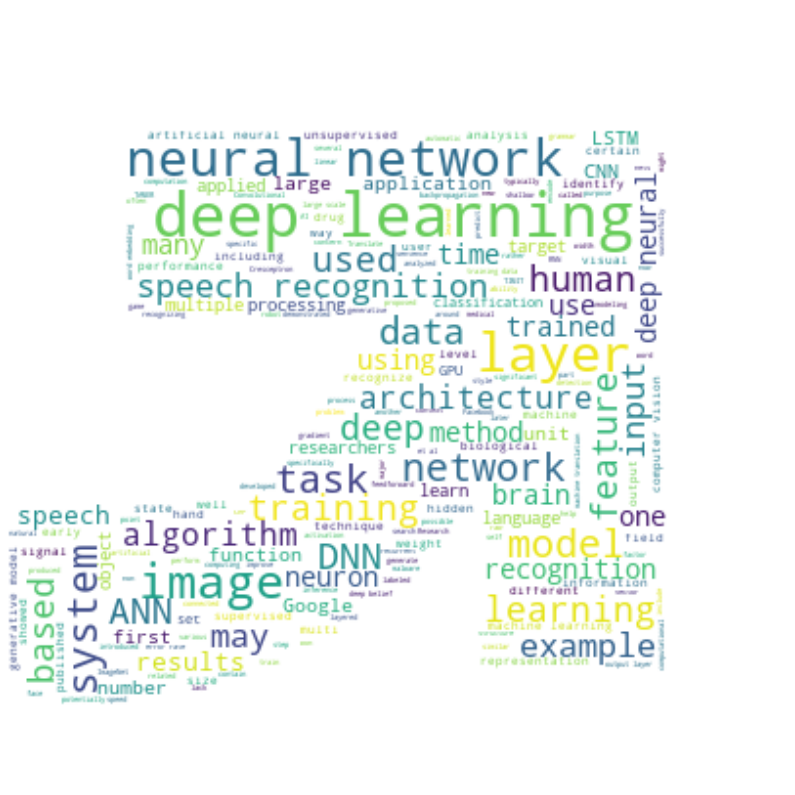

In [0]:
#Generating Mask
#-------------------------------------------------------------------------------------------
upGrad_mask = np.array(Image.open('upgradcom-logo.png'))

#Assigning stopwords
#-------------------------------------------------------------------------------------------
stopwords = set(STOPWORDS)

#Declaring Word-Cloud
#-------------------------------------------------------------------------------------------
data_Science_wc = WordCloud(background_color='white',  mask=upGrad_mask,   stopwords=stopwords)

# generate the word clouds
#-------------------------------------------------------------------------------------------
data_Science_wc.generate(wiki_Content)

# display the word cloud
#-------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(data_Science_wc, interpolation='bilinear')
plt.axis('off')
plt.show()